<img style="float: left;" src="./images/logo.png" width="400"/>

this code is aims at showing you where to find GFAS data and also have some understanding of the data used in the calculation.

As an example we will focus here on CO emissions. 
As a recall the fire emission (E_CO for CO) calculation based on the FRP (as done in GFAS) reads like:
E_CO = Converstion_factor * FRE * EF_CO
where the burning dry matter (DM) is DM = Converstion_factor * FRE
and FRE (Fire Radiative Power) is the time integration of FRP.

Refer to [Kaiser et al 2012](https://bg.copernicus.org/articles/9/527/2012/) for GFAS algoritgm. 

To run this notebook you will need to get data that  
- are available [here]() **not available yet**
- or if you are on andromeda  you can set you directory data to `/data/IMFSE/FBM_unit05/GFAS`


we go throught the different terms of E_CO equation in what follows

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import rioxarray
import geopandas as gpd
import scipy
%matplotlib inline


In [7]:
directory    = '/data/IMFSE/FBM_unit05/Emission/GFAS/'

## Read in Converstion Factor

The conversion factor are static and dependent of the land cover class.

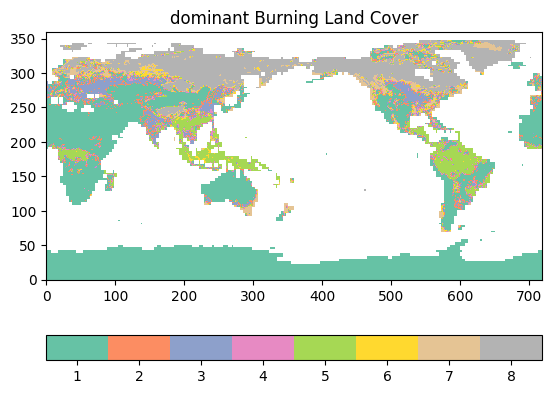

In [106]:
landCover = Dataset(directory+'GFED3_dominantBurningLC_version11112010_GAPFILLED.r720x360JUEL_EXTPEATOS.nc','r')
burninLC = landCover.variables['dominantBurningLC'][0,:,:]
cmap = plt.get_cmap('Set2', np.unique(burninLC).shape[0]-1) # remove 0
im = plt.imshow(np.ma.masked_where( burninLC==0, burninLC),origin='lower',cmap=cmap, vmin=0.5, vmax=8.5,)
cb = plt.colorbar(im, ticks=range(9), orientation="horizontal")
plt.title('dominant Burning Land Cover')

burninLC_hd = scipy.ndimage.zoom(burninLC[::-1,:], 5, order=0) 


conversion factor and area named are in `conversionFactor.txt`

In [39]:
LCidx = pd.read_csv(directory+'conversionFactor.txt')
LCidx.index += 1
LCidx

,land_cover,class_abbrev,conv_factor,fuel_type,
1,savannah,SA,0.78,SA,
2,savannah_with_organic_soil,SAOS,0.26,SA,
3,agriculture,AG,0.29,AG,
4,agriculture_with_organic_soil,AGOS,0.13,AG,
5,tropical_forest,TF,0.96,TF,
6,peat,PEAT,5.87,PEAT,
7,extratropical_forest,EF,0.49,EF,
8,extratropical_forest_with_organic_soil,EFOS,1.55,EF,


## Read in emission factors

In [41]:
data_EF = pd.read_csv(directory+'/GFED4_Emission_Factors_Summary.csv', header=10)
EF_CO = np.array(data_EF.iloc[3])[1:]

data_EF

,Species,SAVA,BORF,TEMF,DEFO,PEAT,AGRI
0,DM,1000.0000,1000.00000,1000.0000,1000.00000,1000.00000,1000.0000
1,C,488.2730,464.98900,489.4160,491.75100,570.05500,480.3520
2,CO2,1686.0000,1489.00000,1647.0000,1643.00000,1703.00000,1585.0000
3,CO,63.0000,127.00000,88.0000,93.00000,210.00000,102.0000
4,CH4,1.9400,5.96000,3.3600,5.07000,20.80000,5.8200
5,NMHC,3.4000,8.40000,8.4000,1.70000,1.70000,9.9000
6,H2,1.7000,2.03000,2.0300,3.36000,3.36000,2.5900
7,Nox,3.9000,0.90000,1.9200,2.55000,1.00000,3.1100
8,N2O,0.2000,0.41000,0.1600,0.20000,0.20000,0.1000
9,PM2.5,7.1700,15.30000,12.9000,9.10000,9.10000,6.2600


## Read in FRP

This is the most demanding term.
FRP is coming from satellite observation. In the case of GFAS, it is still based on the MODIS sensor. A schematic view of the data processing to get from satellite observation to FRP needed in GFAS equation.
- satellite detecte a fire and creata a hot spot. this is a point data with assoiated location (latitude,longitude), time (the time of the satellite aquisition) and FRP (KW). A hot spot is a pixel of the sensor that was tagged with a fire and to which is associated a radiative flux. Large fire can create mutiple hotspot at the same time. Hot spot are used in fire attack to monitor fire activity in Near Real Time (NRT) using product such like [FIRMS](https://firms.modaps.eosdis.nasa.gov/map/#d:24hrs;@0.0,0.0,3.0z)
- you can use the archive of FIRMS to download hotspots observation from MODIS, VIIRS and LandSat. In `GFAS\MODID-HotSpot/fire_archive_M-C61_490672.shp` we upload MODIS hotspot for the whole world for the time period `01-05-2023` to `30-11-2023`.
- To use Emission calculation in atmospheric model, it requires to be gridded. So that the hotspot information need to be spatially and temporally integrated to create map of timely FRP (kW/day/m2). The spatial integration is relatively straighforward, while the time integartion requires to make some assumption as gap observation can exist. For example with the MODIS sensor you have a minimum of 2 overpasses per day thanks to the two satellite Aqua and Terra. In GFAS the time integration is bases on simple data asimulation scheme that assume fire continuation between obervation ([Kaiser et al 2012](https://bg.copernicus.org/articles/9/527/2012/)).

Let first looks at hotspot data in `GFAS\MODID-HotSpot/fire_archive_M-C61_490672.shp`

In [46]:
hotspots = gpd.read_file(directory+'MODID-HotSpot/fire_archive_M-C61_490672.shp')
print(len(hotspots) +' hostops found')
print('show below 10 first hotspots')
markersize[:10]

Text(0.5, 1.0, 'hot spots 01-05` to `30-11-2023')

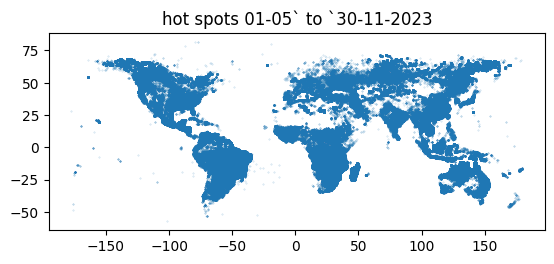

In [63]:
hotspots.plot(markersize=0.1, alpha=.3)
plt.title('hot spots 01-05` to `30-11-2023')

The global impact of fire is quite straitforward. We do not need to plot the map to see the border countour. Let see now the grided version provided by GAFS for the same period. As with FIRMS, data are on open access and can be retreive from the copernicus data server [here](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-fire-emissions-gfas?tab=overview
).

Can you plot a zoom over west europe for example?

The daily FRP at 0.1 degree resolution is avaible for the same time period as above in the file `GFAS/GFAS-FRP-05to11-2023.nc`

In [77]:
frpgfas = Dataset(directory+'GFAS-FRP-05to11-2023.nc','r')
frpgfas.variables.keys()

dict_keys(['longitude', 'latitude', 'time', 'mami', 'frpfire'])

you can see form the above print, that we have two variables in this fire, `frpfire` and `mami`. to see what is `mami` you can run simply

In [79]:
frpgfas['mami'].ncattrs # and check in attribute the long name comment.

<bound method Variable.ncattrs of <class 'netCDF4._netCDF4.Variable'>
int16 mami(time, latitude, longitude)
    scale_factor: 0.11930628195276534
    add_offset: 3909.189634464309
    _FillValue: -32767
    missing_value: -32767
    units: m
    long_name: Mean height of maximum injection
unlimited dimensions: 
current shape = (214, 1800, 3600)
filling on>

In [90]:
#now to plot frpfire sum over the time period
fre = frpgfas.variables['frpfire'][:,:,:].sum(axis=0) * 3600*24 # Fire Radiative Energy (J)/m2

Text(0.5, 1.0, 'FRE over the time period 01-05 to 30-11-2023 (J/m2)')

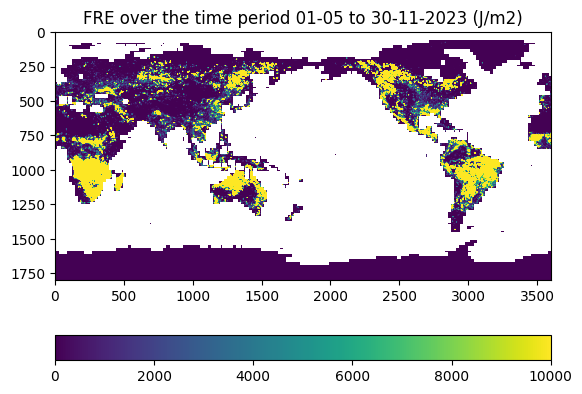

In [115]:
plt.imshow( np.ma.masked_where(burninLC_hd==0,fre),vmax=10000 ) 
plt.colorbar( orientation="horizontal")
plt.title('FRE over the time period 01-05 to 30-11-2023 (J/m2)')

**TO COME** 
add on a small subset like spain, show both hotspot and gridded FWI
compute a density of hotspot and show correlation with FRE

compute MD and emission and compare with GFAS data

compute the emission from elpont de vilomara.
for this I need to change 2023 to 2022 in all data here

## To go further

1. 